In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\sande'

In [3]:
os.chdir('C:\\Users\\sande\\OneDrive\\Desktop\\Excel')

In [4]:
df = pd.read_csv('car_price.csv')

## Data Preprocessing

In [10]:
# checking Missing values
df.isnull().sum()

Unnamed: 0             0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [12]:
# Checking Duplicated values
df.duplicated().sum()

0

In [14]:
#Checking datatypes
df.dtypes

Unnamed: 0              int64
car_name               object
car_prices_in_rupee    object
kms_driven             object
fuel_type              object
transmission           object
ownership              object
manufacture             int64
engine                 object
Seats                  object
dtype: object

In [16]:
df=df.drop(columns='Unnamed: 0',axis=1)

In [18]:
df.dropna()
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [20]:
def convert_price(price):
    if 'Lakh' or 'Crore' in price:
        if 'Lakh' in price:
            number = float(price.split(' ')[0])
            return (number*100000)
        elif 'Crore' in price:
            number = float(price.split(' ')[0])
            return (number*10000000)
    price = price.replace(',','')
    return int(price)

In [22]:
df['car_prices_in_rupee']=df['car_prices_in_rupee'].apply(convert_price)

In [24]:
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,1003000.0,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,1283000.0,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,Toyota Camry 2.5 G,1640000.0,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,Honda Jazz VX CVT,777000.0,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,Volkswagen Polo 1.2 MPI Highline,515000.0,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [26]:
df['kms_driven']=df['kms_driven'].str.replace(' kms','')
df['kms_driven']=df['kms_driven'].str.replace(',','')

In [28]:
df['Seats']=df['Seats'].str.replace(' Seats','')
df['engine']=df['engine'].str.replace(' cc','')

In [30]:
df['car_prices_in_rupee']=df['car_prices_in_rupee'].astype('int')
df['kms_driven']=df['kms_driven'].astype('int')
df['Seats']=df['Seats'].astype('int')
df['engine']=df['engine'].astype('int')

In [32]:
df['ownership']=df['ownership'].str.replace('st Owner','')
df['ownership']=df['ownership'].str.replace('nd Owner','')
df['ownership']=df['ownership'].str.replace('rd Owner','')
df['ownership']=df['ownership'].str.replace('th Owner','')

In [34]:
df['ownership']=df['ownership'].astype(int)

In [36]:
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,1002999,86226,Diesel,Manual,1,2017,1956,5
1,Renault Duster RXZ Turbo CVT,1283000,13248,Petrol,Automatic,1,2021,1330,5
2,Toyota Camry 2.5 G,1639999,60343,Petrol,Automatic,1,2016,2494,5
3,Honda Jazz VX CVT,777000,26696,Petrol,Automatic,1,2018,1199,5
4,Volkswagen Polo 1.2 MPI Highline,515000,69414,Petrol,Manual,1,2016,1199,5


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             5512 non-null   object
 1   car_prices_in_rupee  5512 non-null   int32 
 2   kms_driven           5512 non-null   int32 
 3   fuel_type            5512 non-null   object
 4   transmission         5512 non-null   object
 5   ownership            5512 non-null   int32 
 6   manufacture          5512 non-null   int64 
 7   engine               5512 non-null   int32 
 8   Seats                5512 non-null   int32 
dtypes: int32(5), int64(1), object(3)
memory usage: 280.0+ KB


## Data Analysis

In [41]:
#Analysing relation of each independant variable with dependant variable

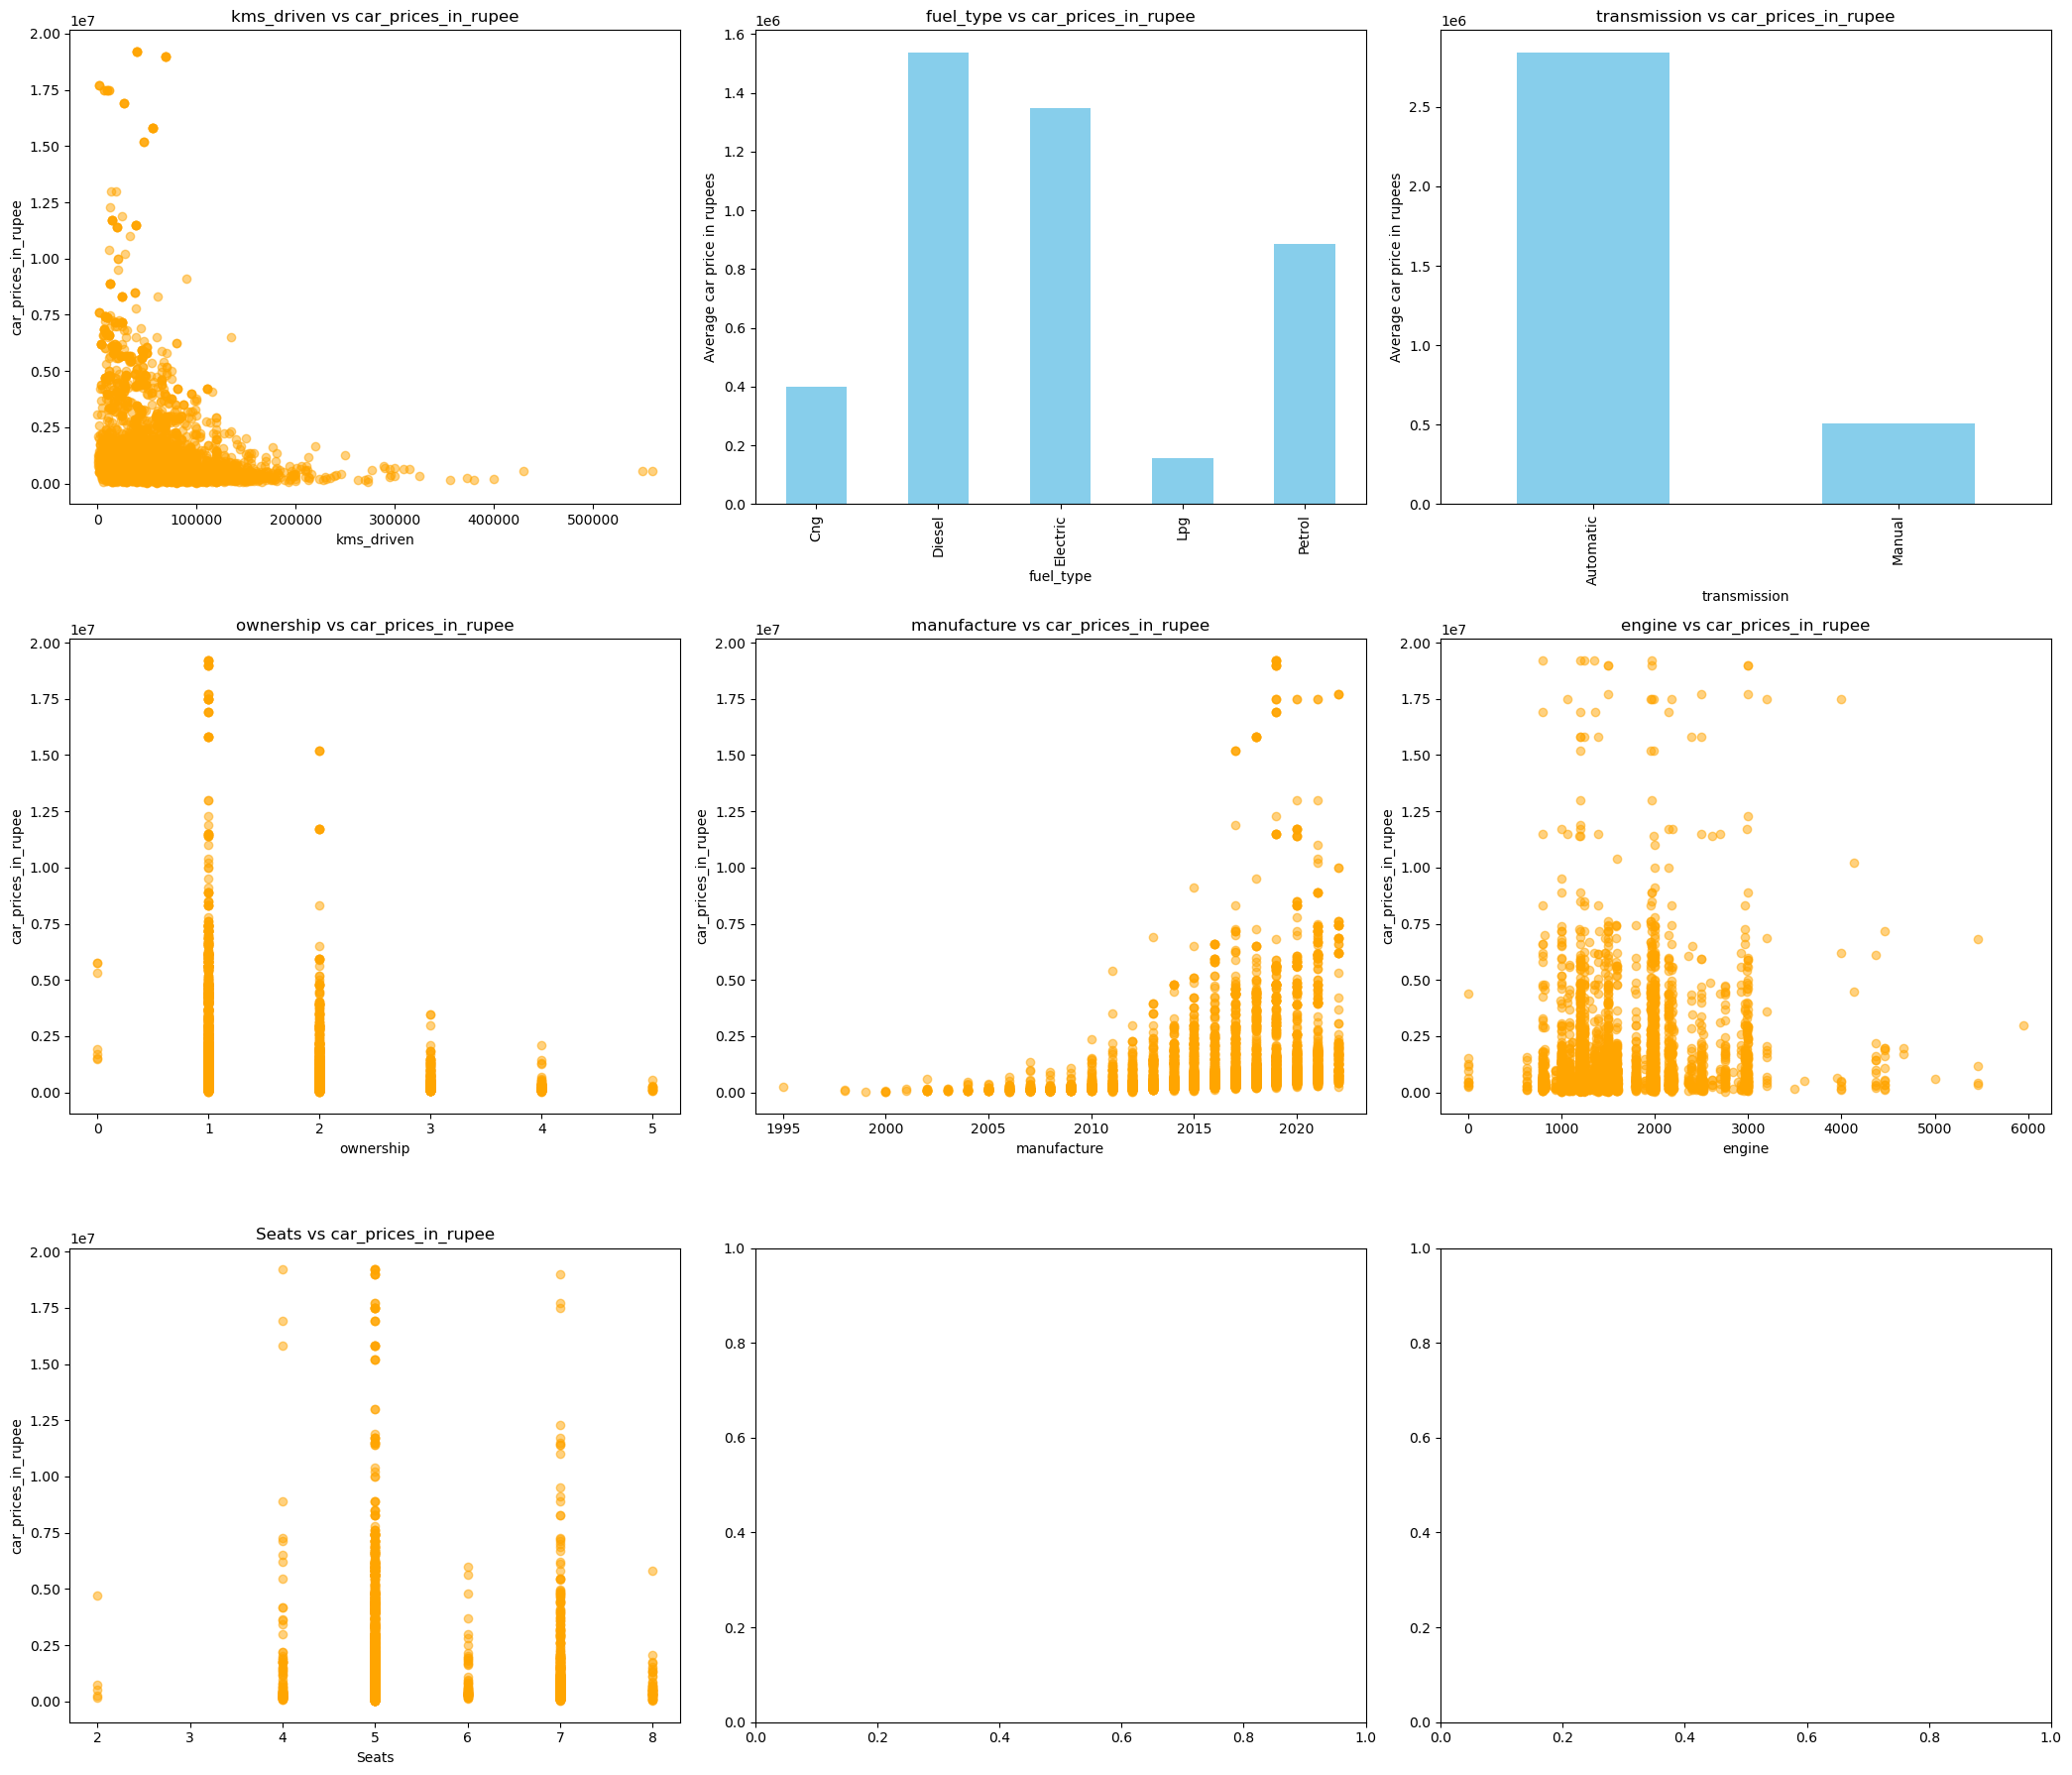

In [43]:
#Plot each column of df VS df['car_prices_in_rupee'] and analyse the results
columns=[ 'kms_driven', 'fuel_type', 'transmission',
       'ownership', 'manufacture','engine', 'Seats']
fig, axes = plt.subplots(3, 3, figsize=(21, 18))
axes = axes.flatten()

# Plot each column against 'car_prices_in_rupee'
for i, column in enumerate(columns):
    if df[column].dtype == 'object':
        # If the column is categorical, we can count the occurrences and plot
        plot_data = df.groupby(column)['car_prices_in_rupee'].mean()
        plot_data.plot(kind='bar', ax=axes[i], color='skyblue')
        axes[i].set_title(f'{column} vs car_prices_in_rupee')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Average car price in rupees')
    else:
        # If the column is numeric, we plot the scatter plot or bar plot for averages
        axes[i].scatter(df[column], df['car_prices_in_rupee'], alpha=0.5, color='orange')
        axes[i].set_title(f'{column} vs car_prices_in_rupee')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('car_prices_in_rupee')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

##### From above data we can say that:
##### 1)Lesser value of kms driven gives higher car price
##### 2)electric and diesel cars are costlier than cng and lpg cars
##### 3)automatic car har more price than manual
##### 4)As number of owner increases, price decreases
##### 5)cars having latest year of manufacture have more price
##### 6)engine with more CC capacity has higher price
##### 5)4 seats car have more price

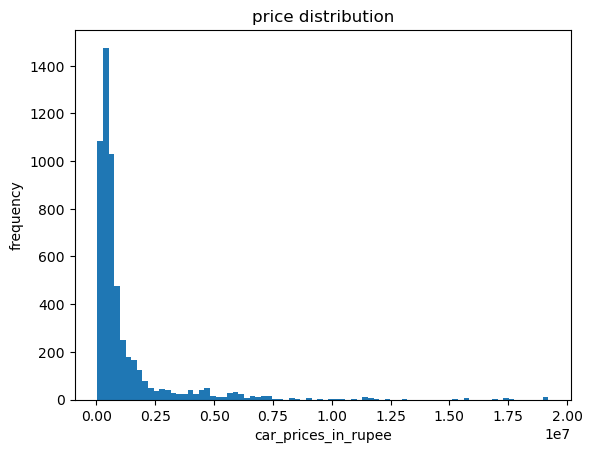

In [45]:
plt.hist(df['car_prices_in_rupee'],bins=80)
plt.xlabel('car_prices_in_rupee')
plt.ylabel('frequency')
plt.title('price distribution')
plt.show()

In [46]:
train = df.copy()

In [47]:
train['car_name']=pd.factorize(train.car_name)[0]
train['fuel_type']=pd.factorize(train.fuel_type)[0]
train['transmission']=pd.factorize(train.transmission)[0]

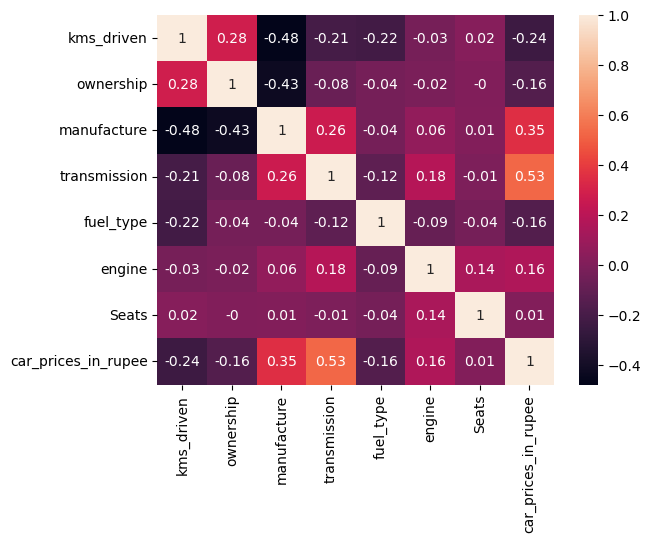

In [49]:
#Label encoding for correlation matrix
import seaborn as sns
numeric_columns=[ 'kms_driven','ownership', 'manufacture','transmission','fuel_type','engine', 'Seats','car_prices_in_rupee']
sns.heatmap(data=train[numeric_columns].corr().round(2),annot=True)
plt.show()

##### As we can see, transmission type, manufacture year, engine rate, fuel type and Kms driven has a strong impact on the car price.

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   car_name             5512 non-null   int64
 1   car_prices_in_rupee  5512 non-null   int32
 2   kms_driven           5512 non-null   int32
 3   fuel_type            5512 non-null   int64
 4   transmission         5512 non-null   int64
 5   ownership            5512 non-null   int32
 6   manufacture          5512 non-null   int64
 7   engine               5512 non-null   int32
 8   Seats                5512 non-null   int32
dtypes: int32(5), int64(4)
memory usage: 280.0 KB


In [57]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
lc = LabelEncoder()

# List of columns to encode
columns_to_encode = ['fuel_type', 'transmission']

# Iterate over each column and encode its values
for col in columns_to_encode:
    df[col] = lc.fit_transform(df[col])

In [59]:
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,1002999,86226,1,1,1,2017,1956,5
1,Renault Duster RXZ Turbo CVT,1283000,13248,4,0,1,2021,1330,5
2,Toyota Camry 2.5 G,1639999,60343,4,0,1,2016,2494,5
3,Honda Jazz VX CVT,777000,26696,4,0,1,2018,1199,5
4,Volkswagen Polo 1.2 MPI Highline,515000,69414,4,1,1,2016,1199,5


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

train['car_name']=pd.factorize(train.car_name)[0]

X = train.drop('car_prices_in_rupee', axis=1)
y = train['car_prices_in_rupee']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

In [63]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4409, 8), (1103, 8), (4409,), (1103,))

R^2 score on training data: 0.9683471918556971


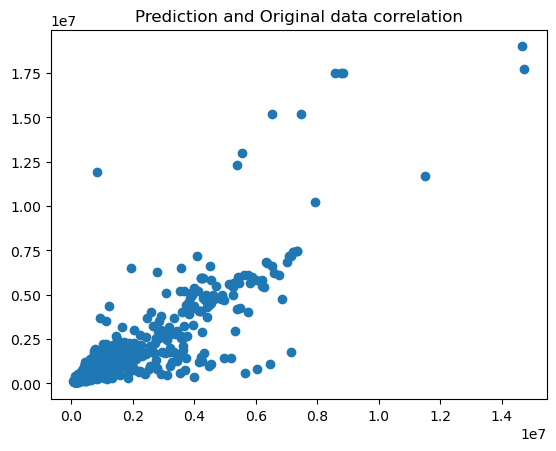

In [65]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Instantiate the Random Forest regressor with specified hyperparameters
regr = RandomForestRegressor(n_estimators=1500, max_depth=50, random_state=42)

# Train the model on the training data
regr.fit(X_train, y_train.values.ravel())

# Make predictions on the testing data
predictions = regr.predict(X_test)

# Visualize the correlation between predictions and actual data
plt.scatter(predictions, y_test)
plt.title('Prediction and Original data correlation')

# Score on training data (calculate R^2 score)
train_score = regr.score(X_train, y_train)
print("R^2 score on training data:", train_score)

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test.values.ravel(), predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test.values.ravel(), predictions)

# Calculate R^2 score
r2 = r2_score(y_test.values.ravel(), predictions)

# Print the results
print(f"MSE: {round(mse, 2)}")
print(f"MAE: {round(mae, 2)}")
print(f"R2 Score: {round(r2, 2)}")

MSE: 1055195682598.43
MAE: 400341.02
R2 Score: 0.74


In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define hyperparameter grid
parameters = {
    'max_depth': [50, 70, 100, 150, 200, 300, 500],
    'n_estimators': [100, 200, 300, 500, 1000, 1250, 1500]
}

# Instantiate Random Forest regressor
regr = RandomForestRegressor(random_state=42)

# Instantiate GridSearchCV
gridforest = GridSearchCV(regr, parameters, cv=3, n_jobs=-1)

# Fit GridSearchCV to training data
gridforest.fit(X_train, y_train)

# Retrieve best parameters
best_params = gridforest.best_params_
print("Best parameters:", best_params)

Best parameters: {'max_depth': 50, 'n_estimators': 300}


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             5512 non-null   object
 1   car_prices_in_rupee  5512 non-null   int32 
 2   kms_driven           5512 non-null   int32 
 3   fuel_type            5512 non-null   int32 
 4   transmission         5512 non-null   int32 
 5   ownership            5512 non-null   int32 
 6   manufacture          5512 non-null   int64 
 7   engine               5512 non-null   int32 
 8   Seats                5512 non-null   int32 
dtypes: int32(7), int64(1), object(1)
memory usage: 237.0+ KB


In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   car_name             5512 non-null   int64
 1   car_prices_in_rupee  5512 non-null   int32
 2   kms_driven           5512 non-null   int32
 3   fuel_type            5512 non-null   int64
 4   transmission         5512 non-null   int64
 5   ownership            5512 non-null   int32
 6   manufacture          5512 non-null   int64
 7   engine               5512 non-null   int32
 8   Seats                5512 non-null   int32
dtypes: int32(5), int64(4)
memory usage: 280.0 KB
